# Whitelist  

whitelist is a feature that allows users to control the sources of their information.  
This feature works as follows:  
- adjust query at the request
- filter output before responding

## Adjust Query at the Request  
- if whitelist is provided, the query parameter will be added with (site:domain.com OR site:domain.xxx)

## Filter Output before Responding
- if whitelist is provided, the retrieved urls will be filtered based on the whitelist

In [4]:
import requests

In [5]:
base_url = f"http://localhost:8080/search?format=json"

In [6]:
# whitelist = "(site:medium.com OR site:geeksforgeeks.org OR site:towardsdatascience.com)"

In [7]:
def get_searxng_query(query, whitelist=None):
    if whitelist:
        whitelist = [f"site:{wl}" for wl in whitelist]
        query = f"{query} ({' OR '.join(whitelist)})"
    return query

In [8]:
%%time
whitelist = ["medium.com", "geeksforgeeks.org", "towardsdatascience.com"]
query = "what does elbow method do in Kmeans clustering?"
params = {"q": get_searxng_query(query, whitelist)}
# params = {"q": get_searxng_query(query)}

response = requests.get(base_url, params=params)

CPU times: user 3.36 ms, sys: 192 μs, total: 3.55 ms
Wall time: 1.25 s


In [9]:
%%time
data = response.json()

CPU times: user 378 μs, sys: 0 ns, total: 378 μs
Wall time: 384 μs


In [11]:
len(data['results']), len(data['suggestions'])

(37, 0)

In [10]:
data.get('suggestions', [])

[]

[{'url': 'https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/',
  'title': 'Elbow Method for optimal value of k in KMeans - GeeksforGeeks',
  'content': 'The Elbow Method helps you choose ... (k) in KMeans clustering. It analyzes how adding more clusters (increasing k) affects the spread of data points within each cluster (WCSS). The k value corresponding to the “elbow” in the WCSS vs k graph is considered the optimal choice. The Elbow Method provides a good starting point, but consider your specific data and goals when finalizing k. You can download the source ...',
  'thumbnail': 'https://imgs.search.brave.com/dKEiwd3h4gAtpglBVYPBe8Z4ECZ1gKOuCjC_mpOHG7A/rs:fit:200:200:1:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZWVrc2Zvcmdl/ZWtzLm9yZy9nZWVr/c2ZvcmdlZWtzL0Vs/Ym93TWV0aG9kZm9y/b3B0aW1hbHZhbHVl/b2ZraW5LTWVhbnMv/RWxib3dNZXRob2Rm/b3JvcHRpbWFsdmFs/dWVvZmtpbktNZWFu/czIwMjQwODA4MTI0/ODI2LnBuZw',
  'engine': 'google',
  'template': 'default.html',
  'parsed_url': ['https',
   'www.g
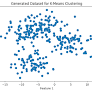
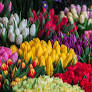
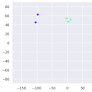

In [8]:
data['results']

In [36]:
%%time
for d in data['results']:
    if d['url'].startswith("https://"):
        print(d['url'])

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189
https://www.geeksforgeeks.org/k-means-clustering-introduction/
https://medium.com/gopenai/optimizing-k-means-clustering-a-guide-to-using-the-elbow-method-for-determining-the-number-of-877c09b2c174
https://origin.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
https://medium.com/@sachinsoni600517/the-art-and-science-of-k-means-clustering-a-practical-guide-e71b11638867
https://medium.com/geekculture/stop-using-the-elbow-method-96bcfbbbe9fd
https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/
https://medium.com/@ayse_nur_safak/elbow-method-for-optimal-value-of-k-in-k-means-clustering-e33a34e8f2a8
https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find

In [1]:
from package.utils.searxng import SearxngSearchOptions, search_searxng

opts = SearxngSearchOptions(
    engines=["google", "bing", "DuckDuckGo"],
    language="en",
    pageno=1
)

whitelist = ["medium.com", "geeksforgeeks.org", "towardsdatascience.com"]
# whitelist = None
question = "what does elbow method do in Kmeans clustering?"

results = search_searxng(query=question, whitelist=whitelist, opts=opts)

In [2]:
for result in results.results:
    print(result.url)

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
https://medium.com/@sujathamudadla1213/what-is-the-purpose-of-the-elbow-method-in-k-means-clustering-and-how-does-it-help-determine-the-6c939dc914c3
https://medium.com/geekculture/stop-using-the-elbow-method-96bcfbbbe9fd
https://www.geeksforgeeks.org/k-means-clustering-introduction/
https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189
https://medium.com/gopenai/optimizing-k-means-clustering-a-guide-to-using-the-elbow-method-for-determining-the-number-of-877c09b2c174
https://medium.com/@sachinsoni600517/the-art-and-science-of-k-means-clustering-a-practical-guide-e71b11638867
https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540
https://medium.com/@gowthamiarva28/exploring-clustering-techniques-k-means-k-means-hierarchical-clust

In [1]:
from urllib.parse import urlparse

url = "https://www.medium.com/article/blog/abc"
whitelist = ["medium.com", "geekforgeek.com"]

# Extract domain from URL
parsed_url = urlparse(url)
domain = parsed_url.netloc

# Optional: remove subdomain (e.g., "www.")
if domain.startswith("www."):
    domain = domain[4:]

# Check if domain matches any entry in whitelist
is_whitelisted = any(domain == wl or domain.endswith(f".{wl}") for wl in whitelist)

print("Whitelisted?" , is_whitelisted)  # True


Whitelisted? True


In [3]:
parsed_url.netloc

'www.medium.com'

In [3]:
from package.utils.searxng import SearxngSearchOptions, search_searxng

opts = SearxngSearchOptions(
    engines=["google", "bing", "DuckDuckGo"],
    language="en",
    pageno=1
)

whitelist = ["medium.com", "geeksforgeeks.org", "towardsdatascience.com"]
# whitelist = None
query = "what is clustering in machine learning"

results = search_searxng(query=query, whitelist=whitelist, opts=opts)

In [4]:
for u in results.results:
    print(u.url)

https://www.geeksforgeeks.org/clustering-in-machine-learning/
https://medium.com/@avicsebooks/ml-part-5-clustering-00d30a977b50
https://medium.com/@gunkurnia/clustering-methods-in-machine-learning-86b5639dacbd
https://utsavdesai26.medium.com/the-beginners-guide-to-clustering-in-machine-learning-331987a7ceaf
https://medium.com/analysts-corner/what-is-clustering-in-context-of-machine-learning-and-data-science-beb0ffa2c34b
https://medium.com/@adeleke.joe/clustering-analysis-in-machine-learning-a-case-study-cf72a7b69096
https://medium.com/@alkapandey/clustering-in-machine-learning-a-technical-overview-of-unsupervised-learning-techniques-77ae76107f4c
https://medium.com/data-science/a-guide-to-clustering-algorithms-e28af85da0b7
https://medium.com/@ChandraPrakash-Bathula/understanding-classification-regression-and-clustering-in-machine-learning-machine-learning-8b77b4b27c87
https://medium.com/@mohamadhasan.sarvandani/top-applications-of-clustering-in-machine-learning-d202f73d6dce
